<a href="https://colab.research.google.com/github/Kevinsamuelgitau/Gitau/blob/master/SAMUEL_GITAU_IP_CORE_W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SAMUEL GITAU

WEEK 4 INDEPENDENT PROJECT

MORINGA SCHOOL CORE





# OVERVIEW

We have Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. The claim made is that

The dataset to be used to investigate our research question is from http://bit.ly/DSCoreAutolibDataset. Here is a glossary to help understand the dataset http://bit.ly/DSCoreAutolibDatasetGlossary. 

The dataset contains information about which cars were taken and returned to the stations, on different times and days. 


# IMPORTING LIBRARIES

In [0]:
# Importing important libraries
import pandas as pd
import numpy as npng
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading the datasets
# Dataset url http://bit.ly/DSCoreAutolibDataset
df = pd.read_csv("autolib_daily_events_postal_code.csv")
df.head()



,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# CHECKING THE DATA


In [5]:
# Determing the number of records in our dataset
df.shape

(16085, 13)

In [6]:
# Previewing the first records of our dataset
df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [7]:
# Previewing the last records of our dataset
df.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [8]:
# Checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# CLEANING THE DATASET

In [9]:
# Capitalize column names for uniformity
df.columns = df.columns.str.strip().str.upper()
df

,POSTAL CODE,DATE,N_DAILY_DATA_POINTS,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [10]:
# Check for missing Data
#
df.isnull().sum()

POSTAL CODE               0
DATE                      0
N_DAILY_DATA_POINTS       0
DAYOFWEEK                 0
DAY_TYPE                  0
BLUECARS_TAKEN_SUM        0
BLUECARS_RETURNED_SUM     0
UTILIB_TAKEN_SUM          0
UTILIB_RETURNED_SUM       0
UTILIB_14_TAKEN_SUM       0
UTILIB_14_RETURNED_SUM    0
SLOTS_FREED_SUM           0
SLOTS_TAKEN_SUM           0
dtype: int64

In [11]:
# change data type for dates

from datetime import datetime
pd.to_datetime(df['DATE'])


0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
16080   2018-06-15
16081   2018-06-16
16082   2018-06-17
16083   2018-06-18
16084   2018-06-19
Name: DATE, Length: 16085, dtype: datetime64[ns]

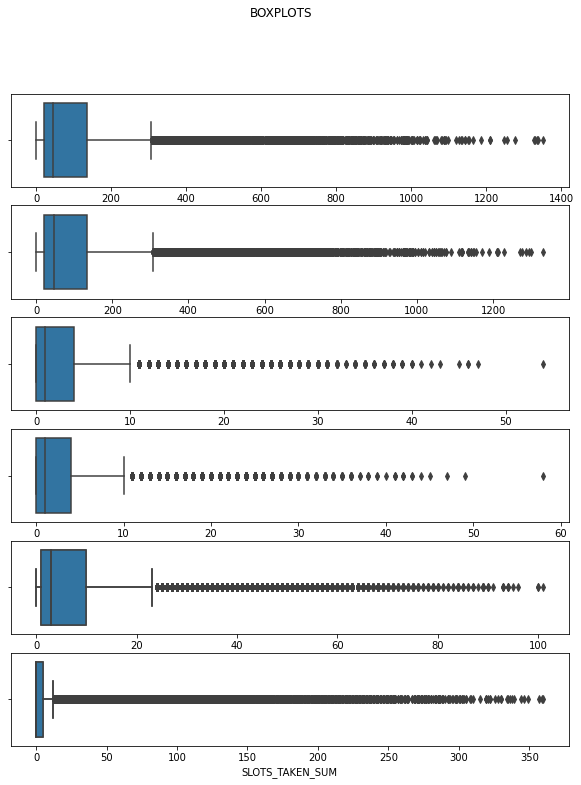

In [17]:
# Cheking for outliers

fig, (ax1, ax2,ax3,ax4, ax5, ax6) = plt.subplots(6,1, figsize=(10,12))

fig.suptitle('BOXPLOTS')

sns.boxplot(df['BLUECARS_TAKEN_SUM'], ax= ax1, orient = 'h')
sns.boxplot(df['BLUECARS_RETURNED_SUM'],ax = ax2, orient = 'h')
sns.boxplot(df['UTILIB_TAKEN_SUM'], ax = ax3, orient = 'h')
sns.boxplot(df['UTILIB_RETURNED_SUM'], ax = ax4, orient = 'h')
sns.boxplot(df['UTILIB_14_TAKEN_SUM'], ax = ax5, orient = 'h')
sns.boxplot(df['UTILIB_14_RETURNED_SUM'], ax = ax5, orient = 'h')
sns.boxplot(df['SLOTS_FREED_SUM'], ax = ax6, orient = 'h')
sns.boxplot(df['SLOTS_TAKEN_SUM'], ax = ax6, orient = 'h')

plt.show()

In [18]:
#check anomalies for numerical data
df.describe() 

,POSTAL CODE,N_DAILY_DATA_POINTS,DAYOFWEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [19]:
# Identifying the Missing Data
#
df.isnull().sum()

POSTAL CODE               0
DATE                      0
N_DAILY_DATA_POINTS       0
DAYOFWEEK                 0
DAY_TYPE                  0
BLUECARS_TAKEN_SUM        0
BLUECARS_RETURNED_SUM     0
UTILIB_TAKEN_SUM          0
UTILIB_RETURNED_SUM       0
UTILIB_14_TAKEN_SUM       0
UTILIB_14_RETURNED_SUM    0
SLOTS_FREED_SUM           0
SLOTS_TAKEN_SUM           0
dtype: int64

In [20]:
# Checking for anomalies
print(df.nunique())

POSTAL CODE               104
DATE                      156
N_DAILY_DATA_POINTS        23
DAYOFWEEK                   7
DAY_TYPE                    2
BLUECARS_TAKEN_SUM        932
BLUECARS_RETURNED_SUM     929
UTILIB_TAKEN_SUM           48
UTILIB_RETURNED_SUM        49
UTILIB_14_TAKEN_SUM        92
UTILIB_14_RETURNED_SUM     94
SLOTS_FREED_SUM           297
SLOTS_TAKEN_SUM           301
dtype: int64


# EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS

In [23]:
# Measure of Central Tendancy for date

f_mode =df[[ 'DATE']].mode()
f_mode.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
DATE,1/24/2018,1/25/2018,1/27/2018,1/28/2018,1/29/2018,2/1/2018,2/23/2018,2/28/2018,2/3/2018,2/4/2018,2/5/2018,4/25/2018,4/26/2018,4/27/2018,4/28/2018,4/29/2018,4/30/2018,5/1/2018,5/2/2018,5/20/2018,5/22/2018,5/23/2018,5/24/2018,5/25/2018,5/26/2018,5/27/2018,5/28/2018,5/29/2018,5/3/2018,5/30/2018,5/31/2018,5/4/2018,5/5/2018,5/6/2018,5/8/2018,6/1/2018,6/10/2018,6/11/2018,6/12/2018,6/2/2018,6/3/2018,6/4/2018,6/5/2018,6/6/2018,6/7/2018,6/8/2018,6/9/2018


In [22]:
# Measure of Central Tendancy for numerical data
df.describe()

,POSTAL CODE,N_DAILY_DATA_POINTS,DAYOFWEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000
